## Assignment 1: Part 2
### Name: Bismay Parija
### Roll Number: 20CS30067

### Load Dependencies

In [218]:
# import all the necessary libraries here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import random
from pprint import pprint

### Load Dataset

In [219]:
# Load the dataset
df = pd.read_csv('../../dataset/decision-tree.csv')
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Train-Test Split

In [220]:
# Separate features and target
X = df.iloc[:, :-1].values
# Reshape to (num_samples, 1)
y = df.iloc[:, -1].values.reshape(-1,1)

# Split into train, test and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.125, random_state=42)

In [221]:
train_data = np.concatenate((X_train, y_train), axis=1)
val_data = np.concatenate((X_val, y_val), axis=1)
test_data = np.concatenate((X_test, y_test), axis=1)

### Check purity

In [222]:
def check_purity(data):
    y = data[:, -1]
    unique_classes = np.unique(y)
    if len(unique_classes) == 1:
        return True
    else:
        return False 


### Classify data

In [223]:
def classify_data(data):
    y = data[:, -1]
    unique_classes, counts = np.unique(y, return_counts = True)
    index = counts.argmax()
    classification = unique_classes[index]
    
    return classification

### Get potential splits

In [224]:
def get_potential_splits(data):
    X = data[:, :-1]
    potential_splits = {}
    _, num_features = X.shape
    for feature_index in range(num_features):
        potential_splits[feature_index] = []
        feature_values = X[:, feature_index]
        unique_values = np.unique(feature_values)

        for index in range(len(unique_values)):
            if index != 0:
                current_value = unique_values[index]
                previous_value = unique_values[index - 1]
                split = (current_value + previous_value) / 2
                potential_splits[feature_index].append(split)
                
    return potential_splits 

### Split data

In [225]:
def split_data(data, feature_index, threshold):
    feature_values = data[:, feature_index]
    data_below_threshold = data[feature_values <= threshold]
    data_above_threshold = data[feature_values > threshold]

    return data_below_threshold, data_above_threshold

### Calculate information gain

In [226]:
def entropy(data):
    y = data[:, -1]
    _, counts = np.unique(y, return_counts = True)
    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
    
    return entropy

In [227]:
def information_gain(data, data_below_threshold, data_above_threshold):
    n = len(data_below_threshold) + len(data_above_threshold)
    wt_above = len(data_below_threshold) / n
    wt_below = len(data_above_threshold) / n
    original_entropy = entropy(data)
    split_entropy = (wt_below * entropy(data_below_threshold) + wt_above * entropy(data_above_threshold))
    info_gain = original_entropy - split_entropy

    return info_gain

### Determine the most informative feature

In [228]:
def find_best_split(data, potential_splits):
    max_info_gain = -float("inf")
    for feature_index in potential_splits:
        for value in potential_splits[feature_index]:
            data_below, data_above = split_data(data, feature_index, value)
            curr_info_gain = information_gain(data, data_below, data_above)
            
            if curr_info_gain > max_info_gain:
                max_info_gain = curr_info_gain
                best_split_feature = feature_index
                threshold = value
    
    return best_split_feature, threshold

In [231]:
def decision_tree_algorithm(data, depth=0):    
    # base cases
    if check_purity(data):
        classification = classify_data(data)
        return classification

    
    # recursive part
    else:    
        depth += 1

        # helper functions 
        potential_splits = get_potential_splits(data)
        feature_index, threshold = find_best_split(data, potential_splits)
        data_below, data_above = split_data(data, feature_index, threshold)
        
        # instantiate sub-tree
        question = "{} <= {}".format(feature_index, threshold)
        sub_tree = {question: []}
        
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, depth)
        no_answer = decision_tree_algorithm(data_above, depth)
        
        sub_tree[question].append(yes_answer)
        sub_tree[question].append(no_answer)
        
        return sub_tree

In [233]:
tree = decision_tree_algorithm(val_data)
pprint(tree)

{'1 <= 194.0': [{'3 <= 56.0': [{'3 <= 48.5': [{'3 <= 45.0': [{'5 <= 9.1': [1.0,
                                                                           {'5 <= 49.45': [{'5 <= 47.8': [{'6 <= 1.837': [{'1 <= 70.5': [0.0,
                                                                                                                                         {'1 <= 76.5': [0.0,
                                                                                                                                                        {'0 <= 12.5': [{'0 <= 11.0': [{'1 <= 79.0': [0.0,
                                                                                                                                                                                                     {'1 <= 191.0': [{'1 <= 188.5': [{'1 <= 184.5': [{'1 <= 178.5': [{'1 <= 172.5': [{'1 <= 162.5': [{'1 <= 154.5': [{'1 <= 151.0': [{'1 <= 148.0': [{'1 <= 146.5': [{'1 <= 144.0': [{'1 <= 141.0': [{'1 <= 139.5': [{'2 <= 106.0':

In [ ]:
potential_splits = get_potential_splits(val_data[:100])
find_best_split(val_data[:100], potential_splits)

(1, 194.0)

In [ ]:
feature_index = 0
threshold = 16.0
data_below_threshold, data_above_threshold = split_data(train_data, feature_index, threshold)
information_gain(train_data, data_below_threshold, data_above_threshold)

0.9340615414780828

In [ ]:
feature_index = 0
threshold = 7.5
data_below_threshold, data_above_threshold = split_data(train_data, feature_index, threshold)

(0.0, 20.0)

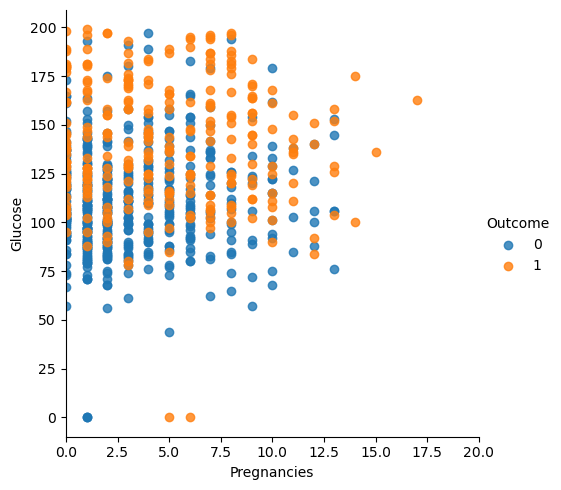

In [ ]:
sns.lmplot(data = df, x = "Pregnancies", y = "Glucose", hue = "Outcome", fit_reg = False)
#plt.vlines(x = threshold, ymin = 0, ymax = 200)
plt.xlim(0, 20)